#### Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as'plt'

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Area Plot
#### An area plot also known as an area chart or graph is a type of plot that depicts accumulated totals using numbers or percentages over time. It is based on the line plot and is commonly used when trying to compare two or more quantities

In [2]:
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


### Clean up the dataset to remove columns that are not informative to us for visualization
#### Rename Some of them Also

In [4]:
df_canada.drop(['AREA','REG','Type','Coverage','DEV'],axis=1,inplace=True)
#Renaming Multiple Column
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


## For Consistency, Ensure that all column labels are type(String)

In [5]:
all(isinstance(column,str) for column in df_canada.columns)
#for column in df_canada.columns:
    #print(isinstance(column,str))

False

In [6]:
df_canada.columns=(list(map(str,df_canada.columns)))

### Set Index

In [7]:
df_canada.set_index('Country',inplace=True)

### Add Total Column

In [8]:
df_canada['Total']=df_canada.sum(axis=1)

### Create a list of Years

In [9]:
years=list(map(str,range(1980,2014)))

## Sort data frame 
###### mpl.style.use('ggplot')

In [10]:
df_canada.sort_values(['Total'],ascending=False,axis=0,inplace=True)

In [12]:
df_top5=df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [14]:
df_top5=df_top5[years].transpose()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [15]:
#Let's Change The Index Values to int
df_top5.index=df_top5.index.map(int)

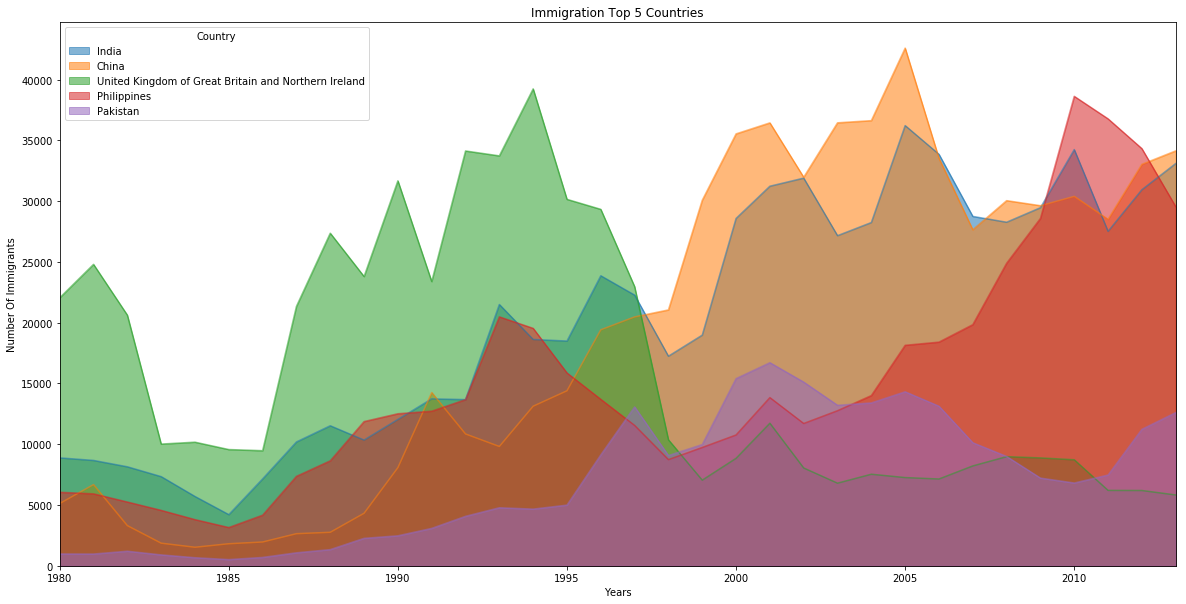

In [17]:
df_top5.plot(kind='area',
             alpha=0.55,
             stacked=False,
             figsize=(20,10),
            )
plt.title("Immigration Top 5 Countries")
plt.ylabel('Number Of Immigrants')
plt.xlabel('Years')
plt.show()

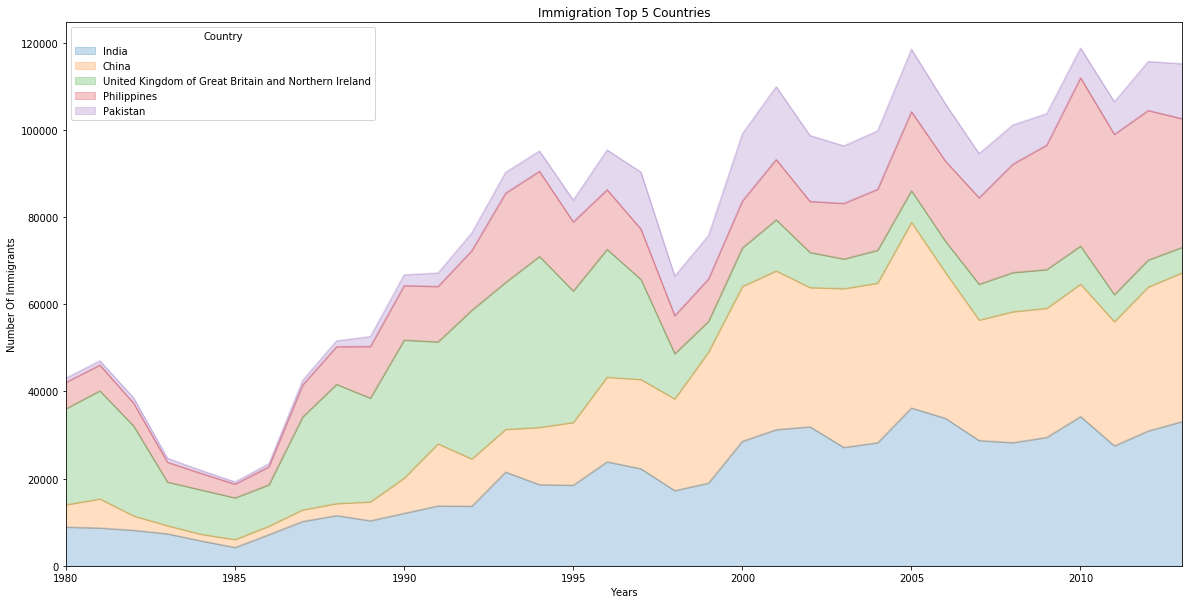

In [18]:
df_top5.plot(kind='area',
             alpha=0.25,
             stacked=True,
             figsize=(20,10),
            )
plt.title("Immigration Top 5 Countries")
plt.ylabel('Number Of Immigrants')
plt.xlabel('Years')
plt.show()

#### *Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) *

Text(0.5, 0, 'Years')

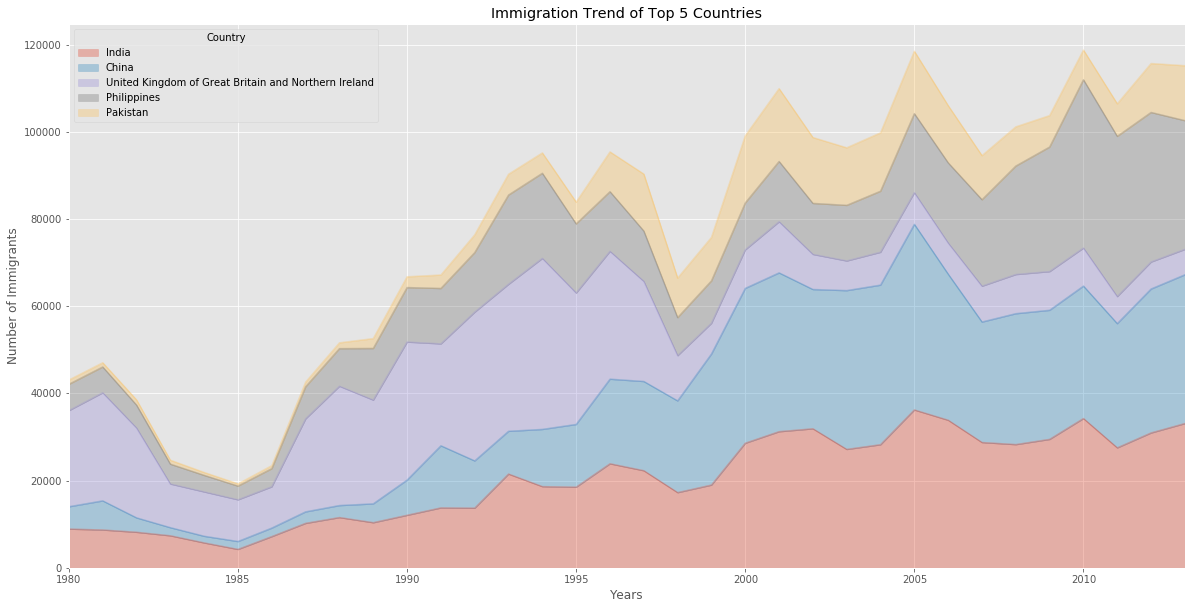

In [66]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### Use the scripting layer to create a stacked area plot of the 5 countries

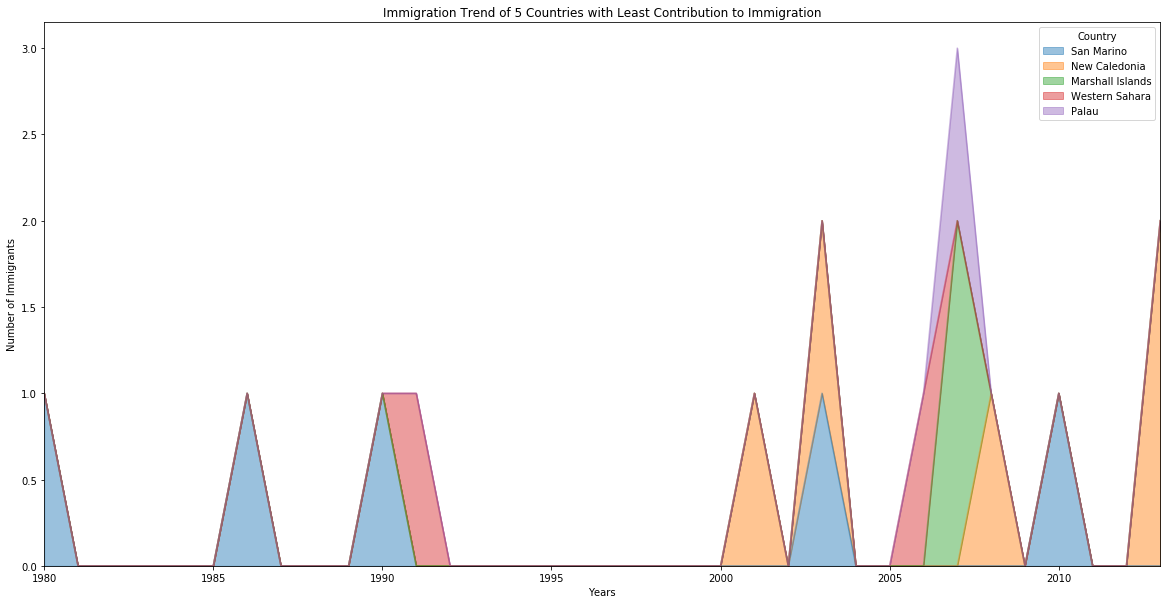

In [39]:
# get the 5 countries with the least contribution
df_least5 = df_canada.tail(5)
# transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()
df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

### Use an artist layer to create a unstacked area plot

Text(0.5, 0, 'Years')

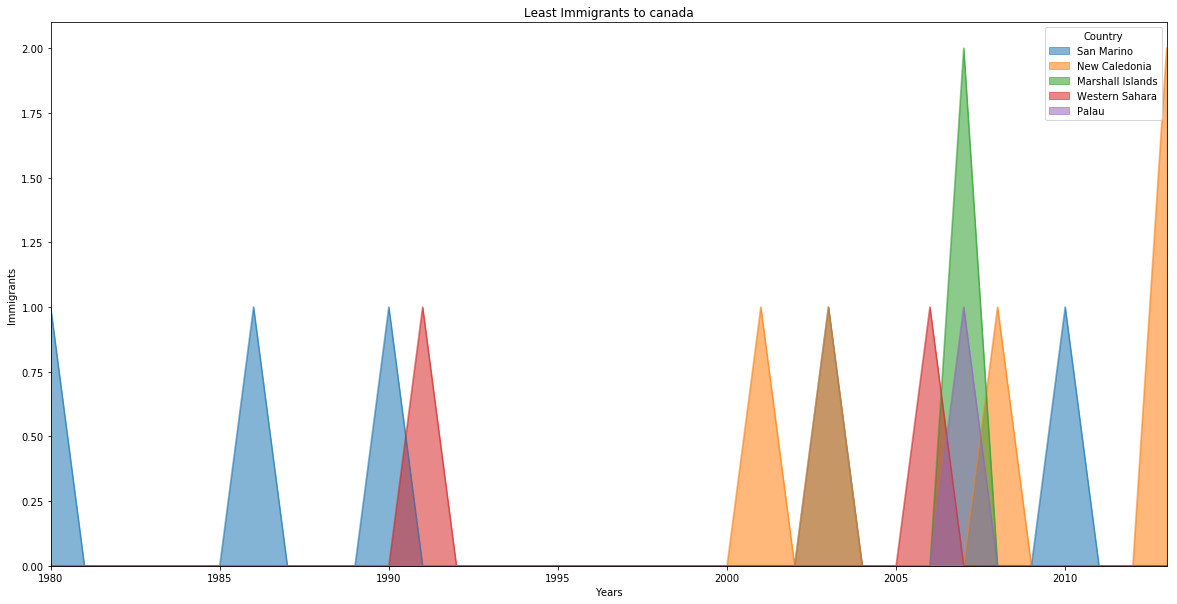

In [41]:
ax=df_least5.plot(kind='area',alpha=0.55,stacked=False,figsize=(20,10))
ax.set_title('Least Immigrants to canada')
ax.set_ylabel('Immigrants')
ax.set_xlabel('Years')

### Histogram:
#### A histogram is a way of representing the frequency distribution of a numeric dataset. The way it works is it partitions the spread of the numeric data into bins, assigns each datapoint in the dataset to a bin, and then counts the number of datapoints that have been assigned to each bin.

## Count the Frequency and Bin_Edges default is 10
### xticks keyword that contains the list of the bin sizes,

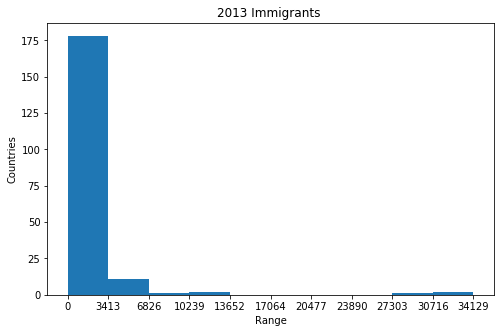

In [91]:
count,bin_edges=np.histogram(df_canada['2013'])
df_canada['2013'].plot(kind='Hist',figsize=(8,5),xticks=bin_edges)
plt.title('2013 Immigrants ')
plt.xlabel('Range')
plt.ylabel('Countries')
plt.show()

#### Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

Text(0, 0.5, 'Number Of Years')

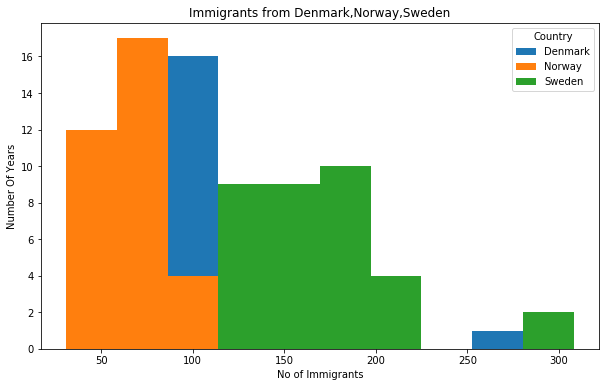

In [92]:
df_t=df_canada.loc[['Denmark','Norway','Sweden'],years].transpose()
df_t.plot(kind='hist',figsize=(10,6))
plt.title('Immigrants from Denmark,Norway,Sweden')
plt.xlabel('No of Immigrants')
plt.ylabel('Number Of Years')

### Change the Bin Size And other Attributes

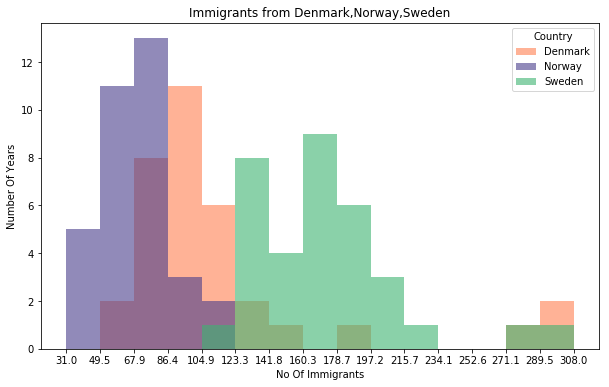

In [93]:
count,bin_edges=np.histogram(df_t,15)
df_t.plot(kind='hist',figsize=(10,6),bins=15,xticks=bin_edges,alpha=0.6,color=['coral','darkslateblue','mediumseagreen'])
plt.title('Immigrants from Denmark,Norway,Sweden')
plt.xlabel('No Of Immigrants')
plt.ylabel('Number Of Years')
plt.show()

#### let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

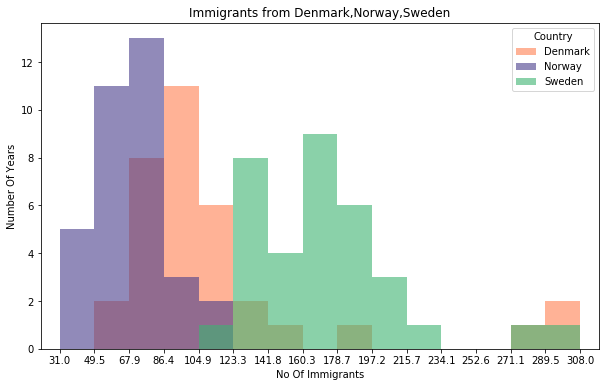

In [94]:
xmin=bin_edges[0]-10
xmax=bin_edges[-1]+10
df_t.plot(
    kind='hist',
    figsize=(10,6),
    bins=15,
    xticks=bin_edges,
    alpha=0.6,
    color=['coral','darkslateblue','mediumseagreen'],
    xlim=(xmin,xmax)
)
plt.title('Immigrants from Denmark,Norway,Sweden')
plt.xlabel('No Of Immigrants')
plt.ylabel('Number Of Years')
plt.show()

In [98]:
df_n=df_canada.loc[['Pakistan','Iran (Islamic Republic of)','India','China','Afghanistan'],years]

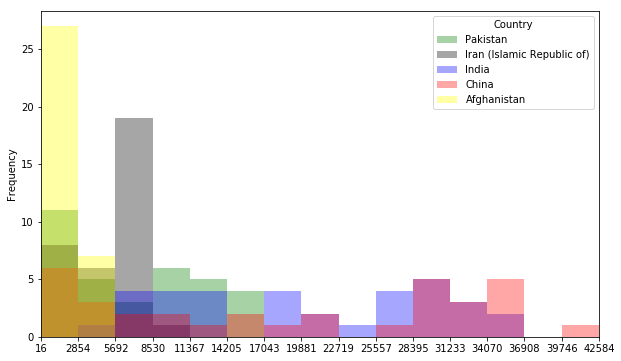

In [99]:
df_n=df_n.transpose()
count,bin_edges=np.histogram(df_n,15)
xmin=bin_edges[0]-10
xmax=bin_edges[-1]+10
df_n.plot(kind='hist',bins=15,alpha=0.35,xticks=bin_edges,figsize=(10,6),color=['green','black','blue','red','Yellow'],xlim=(xmin,xmax))

# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particuarly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar. 

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. 

Text(0.5, 1.0, 'Icelandic Immigrants to Canada from 1980 to 2013')

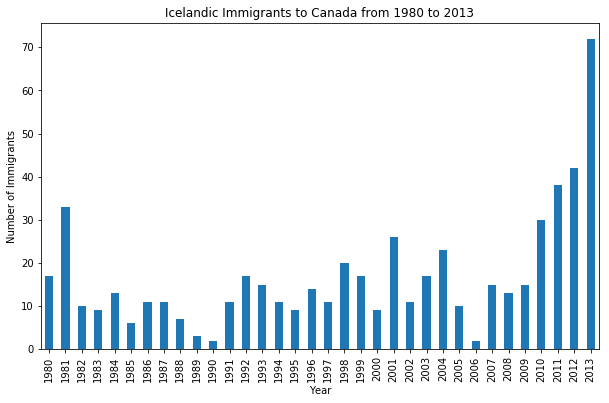

In [102]:
df_iceland=df_canada.loc['Iceland',years]
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

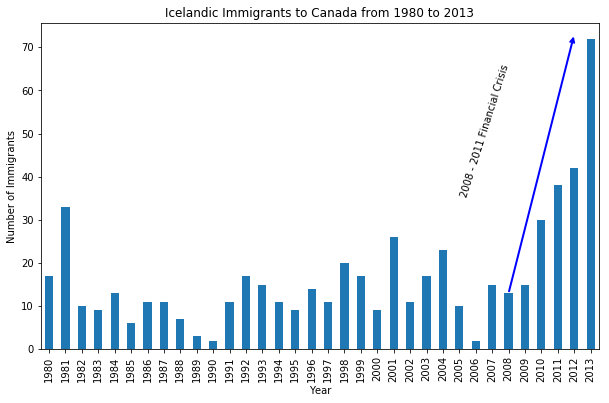

In [131]:
df_iceland=df_canada.loc['Iceland',years]
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 73),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 13),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(25, 35),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.show()

In [187]:
# sort dataframe on 'Total' column (descending)
df_canada.sort_values(by='Total', ascending=True, inplace=True)
# get top 15 countries
df_top15 = df_canada['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

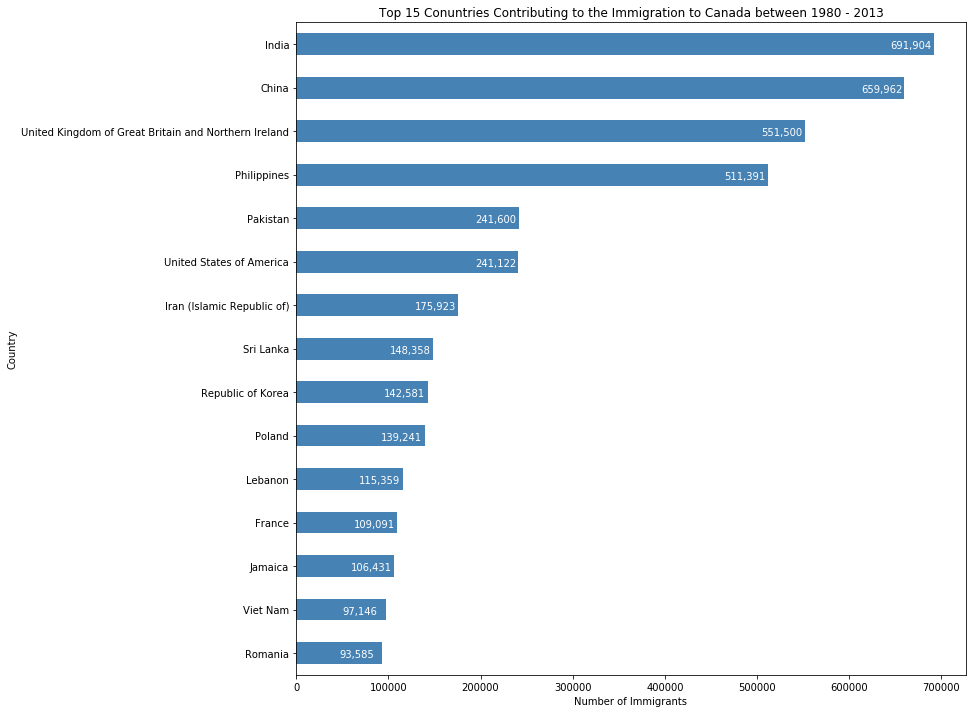

In [188]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()


In [175]:
for index, value in enumerate(df_top15): 
    print(index,'___',value )

0 ___ 93585
1 ___ 97146
2 ___ 106431
3 ___ 109091
4 ___ 115359
5 ___ 139241
6 ___ 142581
7 ___ 148358
8 ___ 175923
9 ___ 241122
10 ___ 241600
11 ___ 511391
12 ___ 551500
13 ___ 659962
14 ___ 691904


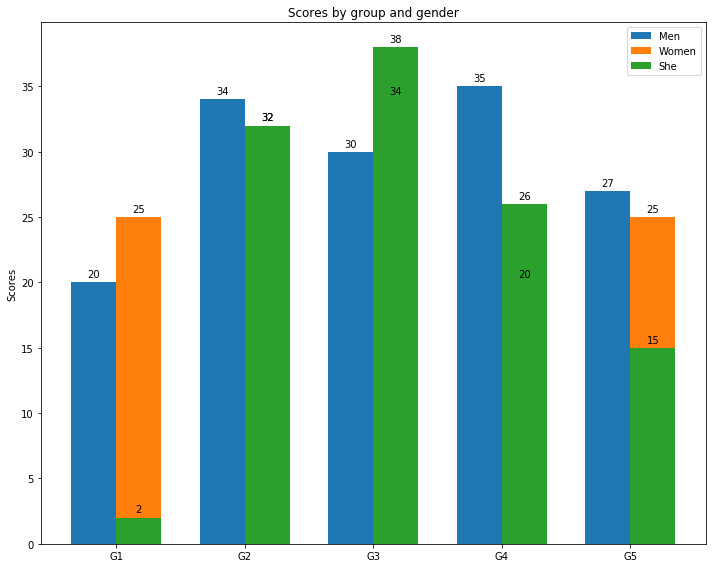

In [10]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
women2_means = [2, 32, 38, 26, 15]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
rects3 = ax.bar(x + width/2, women2_means, width, label='She')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

plt.show()